<a href="https://colab.research.google.com/github/GallardoCarmen/Mineria_Datos/blob/main/CapstoneMineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 02.</font>
##### Carmen Gallardo Martín, David Marín Sala, Laura Lirón Carrión y Nuria Prol Vecoña.

# <font color='00008B'>CAPSTONE.</font>

#Business Understanding - Costes médicos

**¿Qué es un seguro de salud?**

Un seguro de salud es un contrato legal que estableces con una compañía aseguradora. Este contrato incluye un plan de salud que te ayuda a cubrir algunos costos de servicios y cuidados médicos, evitando que tengas que pagar la totalidad de estos gastos.

El seguro de salud ayuda a reducir la cantidad que de otro modo tendrías que pagar por cuidado médico de alto costo.

Funciona así: pagas una tarifa anual para mantener el plan de salud activo. Este plan puede incluir cobertura para visitas preventivas, vacunaciones, hospitalizaciones, urgencias, entre otros. Según el tipo de seguro que elijas, podrías pagar el total o un porcentaje de estos costos. Por lo general, los planes con prima más baja ofrecen menos cobertura.

**Factores que influyen en el precio de un seguro de salud**



*   Leyes federales o estatales:

Existen leyes estatales que determinan la cantidad máxima que una empresa puede cobrar por sus servicios
*   Salario

La ACA, Patient Protection and Affordable Care Act (Ley del Cuidado de Salud a Bajo Precio), garantiza que el precio para seguros médicos sea accesible. Si tus ingresos están dentro de cierto rango, puedes calificar para subsidios que reducen el costo de las primas del seguro de salud que pagas cada mes.

*   Condado de Residencia

Dependiendo de la región en la que vivas, tendrás acceso a una o más opciones de seguros de salud.

*   Edad

Los seguros de salud van aumentando a medida que el asegurado avanza en edad.

*   Hábitos

El uso de tabaco puede incrementar el costo de la prima de seguro de salud hasta en un 50% en comparación con las primas de personas que no fuman. Esto se debe a que fumar se asocia con un mayor riesgo de desarrollar una variedad de condiciones médicas serias, lo que resulta en costos de atención médica más altos.








# Data Understanding

Al conocer llos factores que influyen en el precio del seguro de salud, nuestro objetivo es predecir estos costos utilizando determinadas variables. Para alcanzar esto, aplicaremos técnicas de minería de datos, como la regresión simple y múltiple.

En la disciplina en desarrollo de la ciencia de datos, la minería de datos se reconoce como una metodología crucial para identificar patrones y extraer insights de grandes conjuntos de datos.

Nuestro análisis principal busca determinar cómo variables específicas como la edad, el sexo, el índice de masa corporal (BMI), la cantidad de hijos, el hábito de fumar del asegurado y su ubicación geográfica influyen en los precios de los seguros de salud. El propósito de este estudio es no solo descubrir patrones significativos, sino también crear un modelo predictivo capaz de estimar los costos de seguro basándose en los atributos mencionados.

Para este análisis se utilizará la base de datos denominada "Insurance" contiene un total de 1338 registros, y en ella se encuentran las siguientes variables que serán utilizadas para nuestro análisis:

- **age**: Edad del titular del seguro.
- **sex**: Género del titular, con opciones de femenino o masculino.
- **bmi**: Índice de Masa Corporal, que mide la relación entre el peso y la altura (kg/m²), siendo un indicador estándar de peso corporal. El rango ideal se considera entre 18.5 y 24.9.
- **children**: Número de hijos o dependientes incluidos en el seguro de salud.
- **smoker**: Indicador de si el titular del seguro fuma.
- **region**: Zona geográfica de residencia del asegurado en EE. UU., con opciones de noreste, sureste, suroeste o noroeste.
- **charges**: Costos médicos individuales facturados por el seguro de salud.

A partir de esta información, se buscará obtener conclusiones significativas y desarrollar modelos predictivos sobre los costos del seguro de salud.

---

Comenzamos explorarando algunas de las librerías utilizadas para construir y evaluar el modelo de regresión. Estas librerías no solo proporcionan facilidades para la manipulación y el análisis de datos, sino que también ofrecen herramientas avanzadas para el aprendizaje automático y la visualización de resultados. Vamos a centrarnos en las librerías que son explícitamente útiles para realizar un modelo de regresión. Estas librerías incluyen **`sklearn.model_selection`, `sklearn.metrics`, `sklearn.linear_model`**, y **`sklearn.preprocessing**`.

 * `sklearn.model_selection` esta sublibrería de Scikit-learn proporciona herramientas para dividir los datos en conjuntos de entrenamiento y prueba, realizar validación cruzada, ...
 +` sklearn.metrics` proporciona métricas para evaluar el rendimiento de los modelos de regresión como por ejemplo el MSE, MAE y R^2.
 *  `sklearn.linear_model`contiene algoritmos para realizar la regresión lineal.
 * `sklearn.preprocessing` incluye herramientas para el preprocesamiento de datos, como el escalado y la normalización, que son esenciales para mejorar el rendimiento de los modelos de regresión.
 * `sklearn.cross_decomposition` incluye modelos como la regresión de mínimos cuadrados parciales (PLS), lo cual es útil cuando hay multicolinealidad en los datos.

Estas librerias proporcionan las principales herramientas para preparar los datos, construir y entrenar, y evaluar el rendimiento de nuestro modelo.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc, confusion_matrix
from tabulate import tabulate

In [ ]:
datos = 'insurance.csv'
datos = pd.read_csv(datos)
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Una vez cargada la base de datos, observamos que contamos con un total de 7 variables. Entre ellas, se encuentra la variable objetivo "charges", que representa los costes de salud que deseamos predecir. Las otras variables incluyen tanto características numéricas como categóricas.

# Data Preparation

Para iniciar con la preparación de datos, se estudiarán los valores faltantes en la base de datos, ya que estos pueden influir en la predicción de costes de salud mediante regresión.

In [ ]:
#Comprobación datos faltantes
valores_nan = datos.isnull().sum()
print(valores_nan)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Dado que no se encontraron valores faltantes, procedemos a convertir las variables categóricas a numéricas para poder estudiar su distribución y su correlación con todas las demás variables.


In [ ]:
mapeo_valores = {
    "female": 1,
    "male": 0
}

mapeo_valores2 = {
    "yes": 1,
    "no": 0
}

mapeo_valores3 = {
    "southeast": 0,
    "southwest": 1,
    "northeast": 2,
    "northwest": 3
}

#Reemplazamos los valores actuales por los definidos en el mapeo
datos['sex'] = datos['sex'].replace(mapeo_valores)
datos['smoker'] = datos['smoker'].replace(mapeo_valores2)
datos['region'] = datos['region'].replace(mapeo_valores3)

#Comprobamos los cambios
print(datos[['sex', 'smoker', 'region']].head())


   sex  smoker  region
0    1       1       1
1    0       0       0
2    0       0       0
3    0       0       3
4    0       0       3


El siguiente paso para la preparación de datos es analizar la distribución de cada variable para entender sus características y detectar posibles valores atípicos.

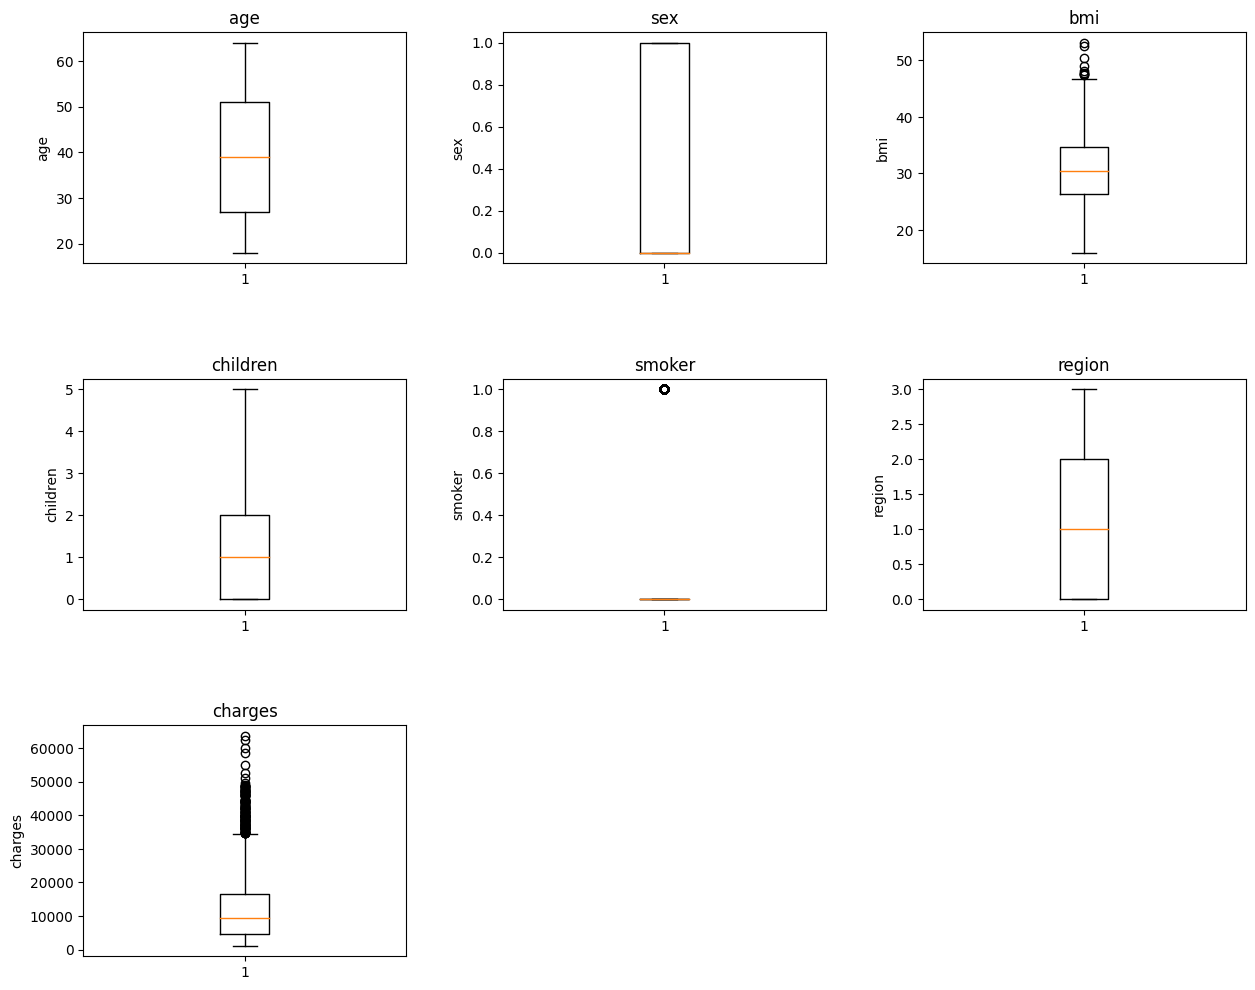

Variable             IQR             Outliers
----------------------------------------
age                  24.00           0
sex                  1.00            0
bmi                  8.40            9
children             2.00            0
smoker               0.00            274
region               2.00            0
charges              11899.63        139


In [ ]:
variables = datos.columns

# Crear una figura con 3 filas y 3 columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espacio entre gráficas

outlier_data = []

for i, var in enumerate(variables):
    ax = axes[i // 3, i % 3]
    ax.boxplot(datos[var].dropna())
    ax.set_title(var)
    ax.set_ylabel(var)

    # Cálculo de cuartiles y valores atípicos
    Q1 = datos[var].quantile(0.25)
    Q3 = datos[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos[var] < (Q1 - 1.5 * IQR)) | (datos[var] > (Q3 + 1.5 * IQR))]
    outlier_count = len(outliers)

    outlier_data.append((var, f"{IQR:.2f}", outlier_count))

# Escondemos los ejes que no usamos
for j in range(i+1, 9):
    axes[j // 3, j % 3].axis('off')

plt.show()

# Mostrar información sobre valores atípicos
print(f"{'Variable':<20} {'IQR':<15} {'Outliers'}")
print('-' * 40)
for var, iqr, count in outlier_data:
    print(f"{var:<20} {iqr:<15} {count}")


A través de los diagramas de cajas, podemos observar el comportamiento de nuestras variables. Identificamos 9 valores atípicos en la variable BMI, que representa el índice de masa corporal; estos outliers se encuentran todos en los valores más altos. En la variable "smoker", obtenemos 274 valores atípicos, pero sabemos que esta variable solo tiene dos categorías: fumador o no fumador. Esto también se refleja en su diagrama de cajas, por lo que en realidad estos no se consideran outliers. Por último, encontramos 139 valores atípicos en la variable "charges". Dado que esta es la variable objetivo, no eliminaremos ninguno de estos outliers ya que pueden contener información relevante.

La decisión que se tomará para tratar los valores atípicos es la siguiente: eliminaremos los outliers de BMI que no estén presentes también en los outliers de "charges". Deseamos mantener todos los datos relevantes de la variable objetivo, por lo que calcularemos la intersección de los outliers de estas dos variables y eliminaremos únicamente los outliers de BMI que no se encuentren en esta intersección.

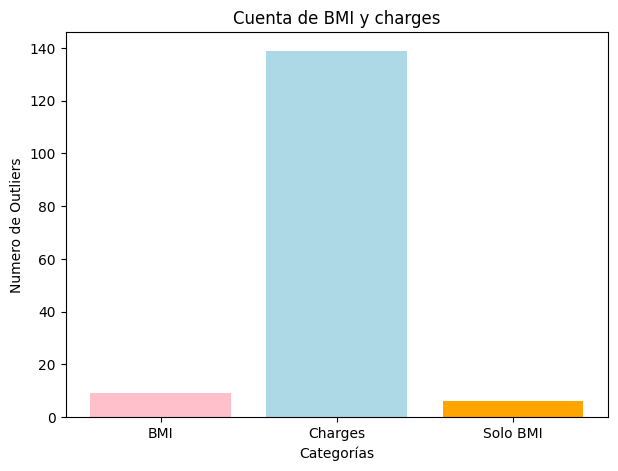



OUTLIERS EN BMI PERO NO EN CHARGES


      age  sex    bmi  children  smoker  region     charges
116    58    0  49.06         0       0       0  11381.3254
286    46    1  48.07         2       0       2   9432.9253
401    47    0  47.52         1       0       0   8083.9198
847    23    0  50.38         1       0       0   2438.0552
1088   52    0  47.74         1       0       0   9748.9106
1317   18    0  53.13         0       0       0   1163.4627


In [ ]:
# Primer y tercer cuartil de ambas variables
Q1b = datos['bmi'].quantile(0.25)
Q3b = datos['bmi'].quantile(0.75)

# Rango intercuartílico
RangoIntb = Q3b - Q1b

Q1c = datos['charges'].quantile(0.25)
Q3c = datos['charges'].quantile(0.75)

RangoIntc = Q3c - Q1c

# Identificación de outliers
outliers_bmi = datos[(datos['bmi'] < (Q1b - 1.5 * RangoIntb)) | (datos['bmi'] > (Q3b + 1.5 * RangoIntb))]
outliers_charges = datos[(datos['charges'] < (Q1c - 1.5 * RangoIntc)) | (datos['charges'] > (Q3c + 1.5 * RangoIntc))]

# Filas que son outliers en bmi pero no en charges
outliers_bmi_only = outliers_bmi[~outliers_bmi.index.isin(outliers_charges.index)]
datos = datos.drop(outliers_bmi_only.index)

#Graficamos
outliers_counts = [
    len(outliers_bmi),
    len(outliers_charges),
    len(outliers_bmi_only)
]

labels = ['BMI', 'Charges', 'Solo BMI']

plt.figure(figsize=(7, 5))
plt.bar(labels, outliers_counts, color=['pink', 'lightblue', 'orange'])
plt.title('Cuenta de BMI y charges')
plt.xlabel('Categorías')
plt.ylabel('Numero de Outliers')
plt.show()

print("\n\nOUTLIERS EN BMI PERO NO EN CHARGES\n\n")
print(outliers_bmi_only)

A través de este análisis, observamos que de los 9 outliers que contenía la variable BMI, 3 de ellos también eran outliers de la variable objetivo "charges". Decidimos mantener estos 3 outliers, ya que pueden aportar información valiosa, como la posible relación entre un mayor BMI y un mayor costo de salud, debido a enfermedades asociadas con el sobrepeso y la obesidad. Por lo tanto, procederemos a eliminar solo los 6 outliers restantes de la variable BMI.

**¿Porqué no normalizamos los datos para las primeras regresiones?**

 Normalizar los datos puede hacer que las predicciones y los coeficientes pierdan su sentido en el contexto de las unidades originales. Esto puede complicar la interpretación de los resultados, especialmente en aplicaciones prácticas.

**Estudio de distribuciones**

Una vez realizado el análisis de outliers, procedemos a examinar la distribución de cada variable en la base de datos. Al observar estas distribuciones, podremos identificar cuáles presentan una forma similar a la de la variable "charges". Esta comparación es crucial para determinar qué variables son candidatas potenciales para incluir en el proceso de regresión. Esto nos ayudará a entender mejor las relaciones entre "charges:" y otras variables, y a seleccionar aquellas que podrían ser predictores significativos en nuestro modelo de regresión.

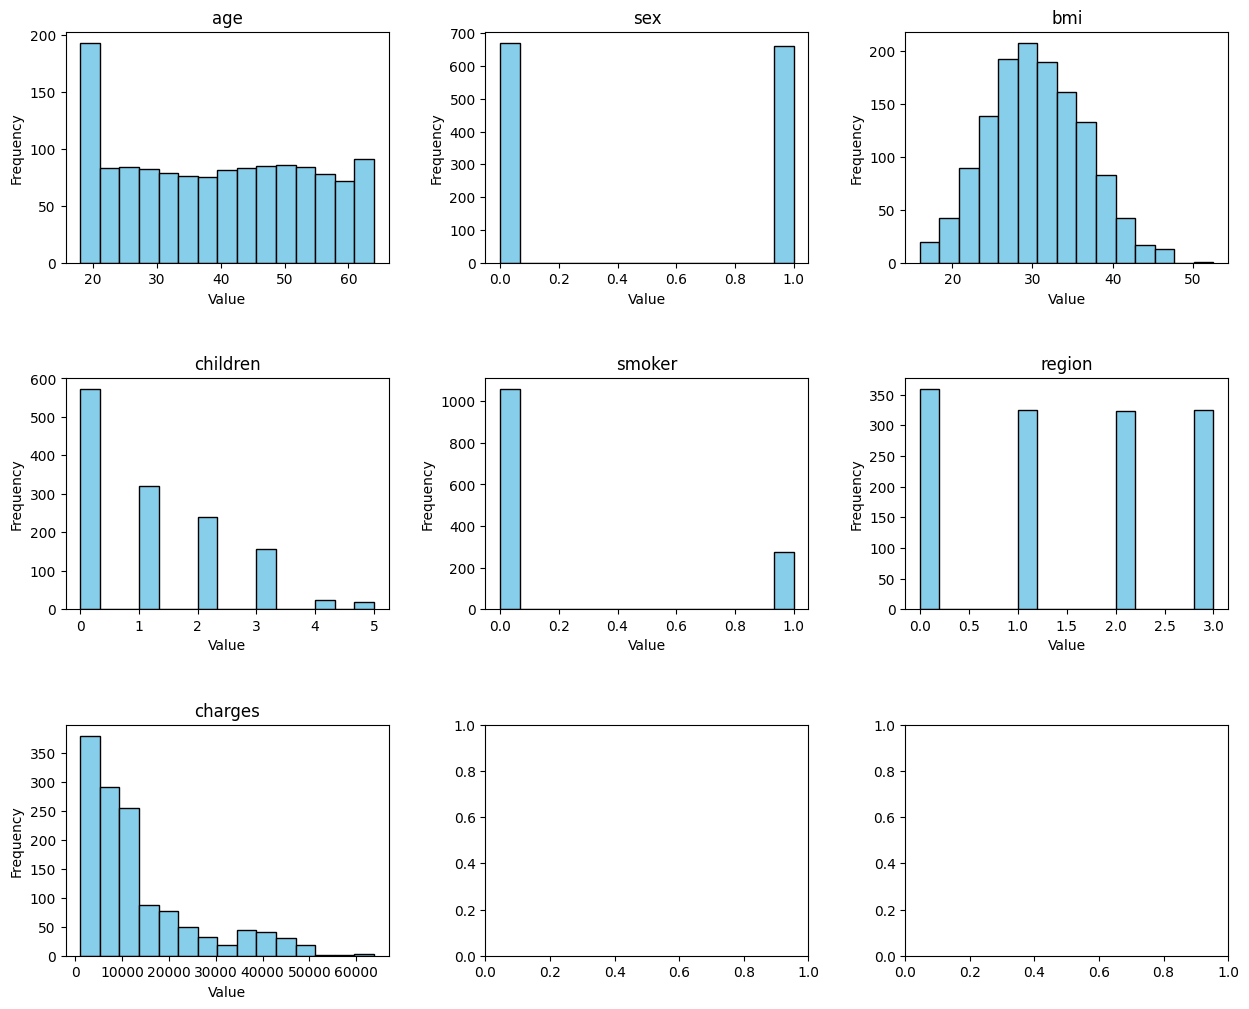

In [ ]:
fig, ejes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espacio entre gráficas

for i, var in enumerate(variables):
    ax = ejes[i // 3, i % 3]
    ax.hist(datos[var].dropna(), bins=15, color='skyblue', edgecolor='black')
    ax.set_title(var)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()


A través de los histogramas observamos la distribución de las variables. Las variables que presentan cierta similitud con la distribución de "charges" son "smoker" y "children". Ambas variables muestran un comportamiento donde los valores comienzan altos y luego disminuyen, similar a lo que observamos con "charges".

Estas relaciones tienen sentido, ya que el estado de ser fumador es un factor significativo: los fumadores suelen tener mayores costes de salud debido a enfermedades relacionadas con el tabaquismo. En cuanto a la variable "children", tener más hijos podría influir en los costes de salud, ya que refleja mayores necesidades de servicios médicos para la familia.


**Matriz de correlación**

Para asegurarnos de esta relación entre variables, crearemos una matriz de correlación y utilizaremos para el modelo de regresión las variables que presenten mayor correlación, ya sea positiva o negativa, con la variable objetivo "charges".

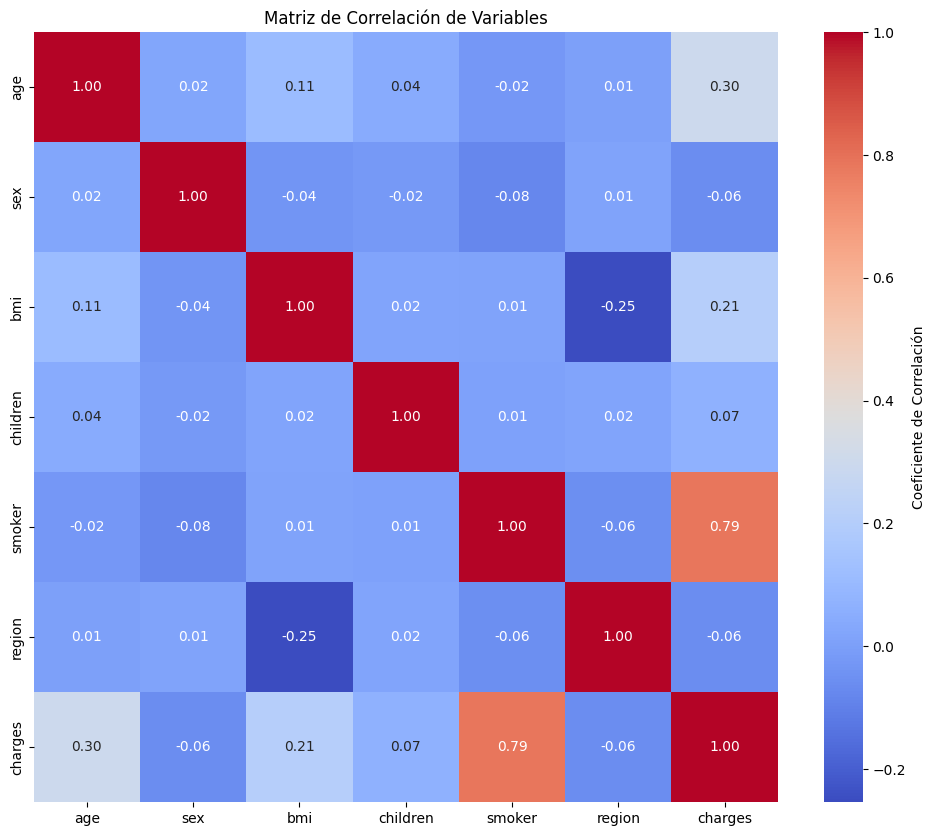

charges     1.000000
smoker      0.787179
age         0.298758
bmi         0.210520
children    0.067406
region     -0.059796
sex        -0.059289
Name: charges, dtype: float64

In [ ]:
plt.figure(figsize=(12, 10))

corr_matrix = datos.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title("Matriz de Correlación de Variables")
plt.show()

#Correlaciones con la variable objetivo
#Orden de mayor a menor en valor absoluto
correlaciones_charges = corr_matrix['charges'].sort_values(key=lambda x: x.abs(), ascending=False)
correlaciones_charges


La mayor correlación que se presenta en la matriz es entre "smoker" y "charges" (0.787179). Esto indica que a medida que una persona es fumadora, los costes de salud ("charges") tienden a ser significativamente más altos. Esta fuerte correlación sugiere que el hábito de fumar está estrechamente relacionado con un aumento en los costes de salud.



# Modelos - Regresión

## Regresión simple (Smoker vs Charges)

Aplicamos una regresión lineal simple, que es una técnica de análisis predictivo que se utiliza para predecir el valor de una variable dependiente en función de una variable independiente. Esta relación entre ambas variables se representa mediante una línea recta.

La ecuación de la regresión lineal simple tiene la forma:

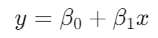

Donde:

 * y es la variable dependiente
 * x es la variable independiente
 * 𝛽0 es el intercepto (valor de y cuando x=0)
 * 𝛽1 es el coeficiente de regresion (indica cuanto cambia y por cada unidad de cambio en x)

En nuestro caso, tratamos de predecir como afecta el hecho de ser fumador al coste del seguro médico. Siendo por lo tanto **smoker** nuestra variable independiente y **charges** la variable dependiente.

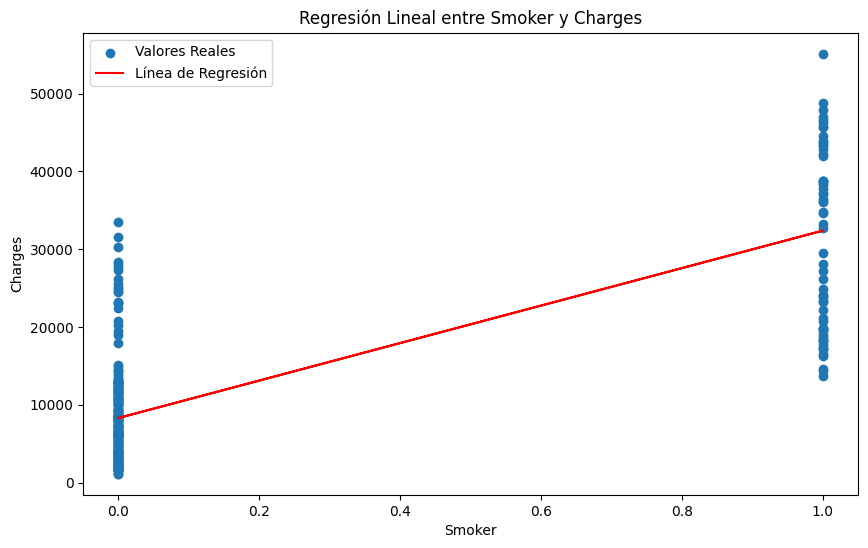

In [ ]:
X = datos[['smoker']]  #variable independiente
y = datos['charges']    #variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones coon el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['smoker'], y_test, label='Valores Reales')
plt.plot(X_test['smoker'], y_pred, color='red', label='Línea de Regresión')  # Línea de regresión
plt.title('Regresión Lineal entre Smoker y Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend()
plt.show()

Observamos como la línea roja representa la línea de regresión ajustada.

Los puntos azules son los valores reales de los datos de prueba que solo pueden tomar los valores 0 y 1 dado que la variable smoker es binaria.

Cuando smoker es **0 (no fumador)** , los puntos azules a la izquierda muestran los precios del seguro para los no fumadores.

Mientras que si smoker es **1 (fumador)**, los puntos azules a la derecha muestran los precios del seguro para los fumadores.

Por lo tanto, podemos observar cómo el precio del seguro tiende a ser más alto para los fumadores en comparación con los no fumadores.

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coeficientes:", coefficients)
print("Término independiente (Intercepto):", intercept)

Coeficientes: [24094.70091281]
Término independiente (Intercepto): 8302.183239647127


Nuestra regresión lineal queda por lo tanto de la siguiente forma:

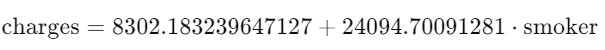

Y concluimos que el hecho de ser fumador (smoker = 1) incrementa el costo del seguro (charges) en aproximadamente 24095 unidades del precio en comparación con no ser fumador (smoker = 0), manteniendo todo lo demás constante.

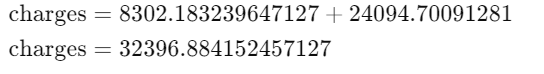

Mientras que precio base del seguro para un no fumador (smoker = 0) es de aproximadamente 8302 dólares.

**Comparación valores reales vs predichos**

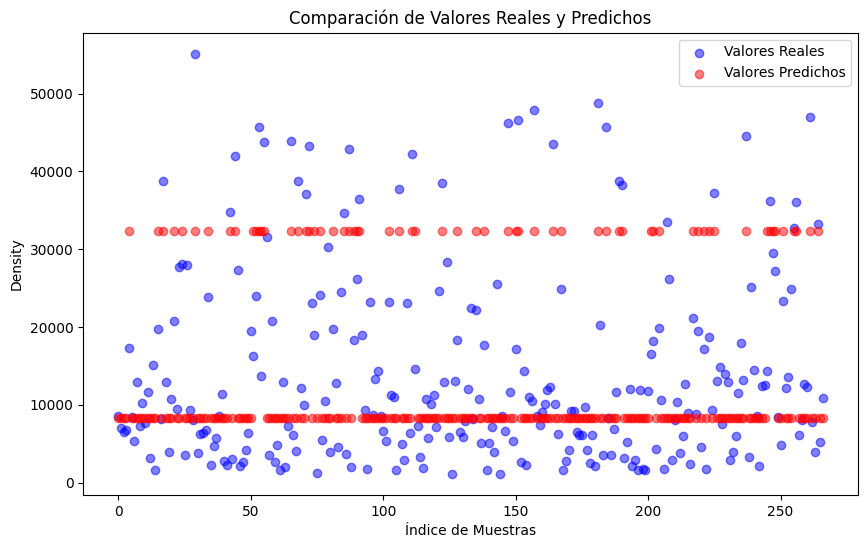

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valores Predichos', alpha=0.5)
plt.title('Comparación de Valores Reales y Predichos')
plt.xlabel('Índice de Muestras')
plt.ylabel('Density')
plt.legend()

plt.show()

**Métricas de error**

Ahora calcularemos las metricas de error para entender como de bien el modelo está prediciendo los valores reales, estas métricas miden la diferencia entre los valores predichos por el modelo y los valores reales de los datos y además nos permiten cuantificar el rendimiento del modelo y compararlo con otros modelos.
* MSE calula la media de los cuadrados de los errores entre los valores predichos y los valores reales y penaliza más los errores grandes. Un MSE más bajo indica mejores predicciones.

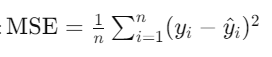

* MAE calcula la media de los errores absolutos entre los valores predichos y los valores reales. Proporciona una medida clara y fácil de entender del error promedio, además es menos sensible a los errores grandes que el MSE.

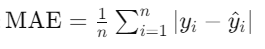



In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el rango de los valores reales
range_y = y_test.max() - y_test.min()

# Normalizamos el error
normalized_mae = mae / range_y

print(f'Error cuadrático medio en el conjunto de prueba: {mse}')
print(f'Error absoluto medio en el conjunto de prueba: {mae}')
print(f'Error absoluto normalizado: {normalized_mae}')

Error cuadrático medio en el conjunto de prueba: 65448661.501558736
Error absoluto medio en el conjunto de prueba: 6140.24088327077
Error absoluto normalizado: 0.113720890736124


Estos valores nos indican que hay grandes errores en nuestras predicciones lo que podría solucionarse añadiendo más variables al modelo

Ahora calculamos coeficiente de determinación R^2 para indicar qué proporción de la varianza de la variable dependiente es explicada por el modelo de regresión. La fórmula para calcularlo es:

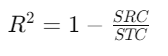

Siendo SRC la suma de los residuos al cuadrado

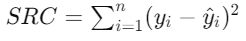

STC  es la suma de los cuadrados total.

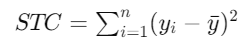



In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación: {r2}')

Coeficiente de determinación: 0.5623509905342616


Obtenemos un R^2 de aproximadamente 0.5623. Esto se interpreta como que el 56.24% de la variabilidad en los precios del seguro (charges) puede ser explicada por el hecho de ser fumador (smoker). Sin embargo, la agrupación de los puntos rojos en varias líneas horizontales, es decir de los valores predichos, sugiere que el modelo está prediciendo un número limitado de valores distintos para charges, y esto puede deberse a que la variable smoker es binaria. Por ello para mejorar las predicciones en los precios necesitaremos incluir más variables en nuestra regresión.

## Regresión Múltiple

En este apartado, se han desarrollado y evaluado modelos de regresión múltiple para predecir el costo de los seguros médicos (charges) utilizando distintos conjuntos de atributos. El objetivo es determinar la efectividad de diferentes combinaciones de características en la precisión de las predicciones.

Para comenzar, separamos las características predictoras (X) de la variable objetivo (y), que es el costo de los seguros médicos (charges). Luego, dividimos los datos en conjuntos de entrenamiento y prueba con una proporción del 80-20.

In [ ]:
# Separamos las características (X) del OBJETIVO (y).
X = datos.drop('charges', axis=1)
y = datos['charges']

# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción del 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos tres conjuntos de características con 4, 8 y 12 atributos.
X_3 = X[['smoker', 'age', 'bmi']]
X_6 = X[['smoker', 'age', 'bmi', 'children', 'sex', 'region']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión con 3 atributos.
modelo_3 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
modelo_3.fit(X_train_3, y_train_3)

# Creamos el modelo de regresión con 6 atributos
modelo_6 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
modelo_6.fit(X_train_6, y_train_6)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

Hemos creado dos conjuntos de características: uno con 3 atributos (smoker, age, bmi), otro con 6 atributos (smoker, age, bmi, children, sex, region), y hemos dividido estos conjuntos en subconjuntos de entrenamiento y prueba, manteniendo la misma proporción ya mencionada del 80-20.

A continuación, ajustamos los dos modelos de regresión utilizando el algoritmo SGDRegressor con los conjuntos de características mencionados. El primer modelo se entrenó con 3 atributos, y el segundo con 6 atributos. Ambos modelos se escalaron previamente con StandardScaler para normalizar los datos y mejorar la estabilidad del entrenamiento.

**Comparación valores reales vs predichos**

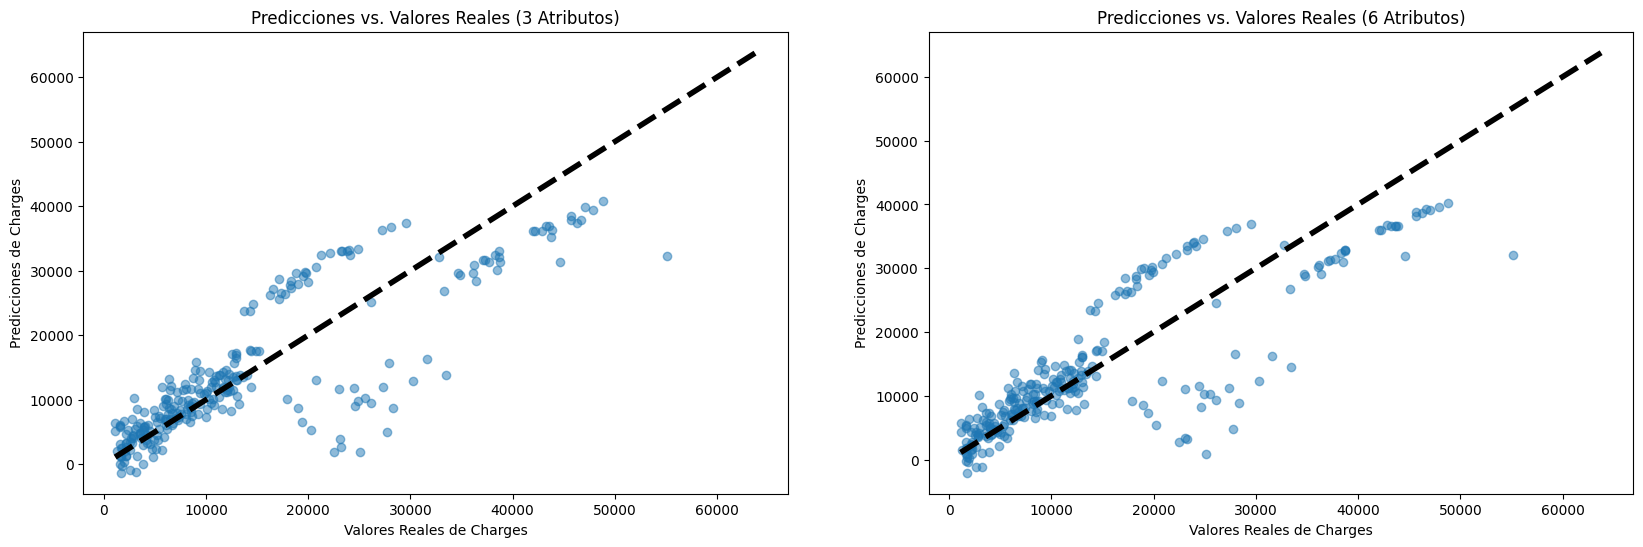

In [ ]:
# Realizamos predicciones con los modelos.
y_pred_3 = modelo_3.predict(X_test_3)
y_pred_6 = modelo_6.predict(X_test_6)

# Graficamos las predicciones vs los valores reales para cada modelo.
plt.figure(figsize=(20, 6))

# Gráfico para el modelo con 3 atributos.
plt.subplot(1, 2, 1)
plt.scatter(y_test_3, y_pred_3, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (3 Atributos)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

# Gráfico para el modelo con 6 atributos.
plt.subplot(1, 2, 2)
plt.scatter(y_test_6, y_pred_6, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (6 Atributos)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.show()

Una vez entrenados los modelos, hemos realizado predicciones sobre los conjuntos de prueba y se visualizaron los resultados comparando las predicciones con los valores reales de charges. Los gráficos generados muestran la relación entre las predicciones y los valores reales, permitiendo una evaluación visual de la precisión de los modelos.

Para evaluar cuantitativamente los modelos, calculamos el error cuadrático medio (MSE) y el error absoluto medio (MAE) para ambos conjuntos de atributos.

**Métricas de error**

In [ ]:
# Calcular el MSE, MAE y R^2 para el modelo de 3 atributos
mse_3 = mean_squared_error(y_test_3, y_pred_3)
mae_3 = mean_absolute_error(y_test_3, y_pred_3)
r2_3 = r2_score(y_test_3, y_pred_3)

# Calcular el MSE, MAE y R^2 para el modelo de 6 atributos
mse_6 = mean_squared_error(y_test_6, y_pred_6)
mae_6 = mean_absolute_error(y_test_6, y_pred_6)
r2_6 = r2_score(y_test_6, y_pred_6)

# Calcular el rango de los valores reales generales
range_y_3 = y_test_3.max() - y_test_3.min()
range_y_6 = y_test_6.max() - y_test_6.min()

# Normalizar el MAE
normalized_mae_3 = mae_3 / range_y_3
normalized_mae_6 = mae_6 / range_y_6

# Resultados para el modelo de 3 atributos
print("\nResultados del modelo de 3 atributos:")
print(f'Error cuadrático medio en el conjunto de prueba: {mse_3}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_3}')
print(f'Error absoluto normalizado: {normalized_mae_3}')
print(f'Coeficiente de determinación: {r2_3}')

# Resultados para el modelo de 6 atributos
print("\nResultados del modelo de 6 atributos:")
print(f'Error cuadrático medio en el conjunto de prueba: {mse_6}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_6}')
print(f'Error absoluto normalizado: {normalized_mae_6}')
print(f'Coeficiente de determinación: {r2_6}')


Resultados del modelo de 3 atributos:
Error cuadrático medio en el conjunto de prueba: 44367724.93942301
Error absoluto medio en el conjunto de prueba: 4606.691018485062
Error absoluto normalizado: 0.08531864073859688
Coeficiente de determinación: 0.7033172195351258

Resultados del modelo de 6 atributos:
Error cuadrático medio en el conjunto de prueba: 44514581.33211823
Error absoluto medio en el conjunto de prueba: 4589.314665068778
Error absoluto normalizado: 0.08499682040193397
Coeficiente de determinación: 0.7023352047265381


Los resultados muestran que el modelo de regresión con 6 atributos nos da una mejor precisión en comparación con el modelo de 3 atributos, tal como lo indican los valores menores de MSE y MAE. Sin embargo, la diferencia en el rendimiento entre los dos modelos no es excesivamente significativa, lo que sugiere que los tres atributos adicionales no aportan una mejora notable en la predicción.


## Modelo mixto

Un modelo mixto es una técnica que combina efectos fijos y aleatorios en su estructura. Los efectos fijos representan las relaciones comunes a todos los individuos en el estudio, mientras que los efectos aleatorios capturan la variabilidad específica de subgrupos o individuos. Este enfoque es particularmente útil cuando los datos presentan estructuras jerárquicas o de agrupamiento, como pacientes en diferentes hospitales, estudiantes en distintas escuelas o, como en nuestro caso, fumadores y no fumadores en un conjunto de datos de seguros médicos.

La principal ventaja de los modelos mixtos es su capacidad para manejar y modelar la variabilidad dentro y entre los grupos, proporcionando una estimación más precisa y generalizable de los efectos de las variables predictoras. Además, permiten la inclusión de términos de correlación que pueden existir dentro de los grupos, lo que mejora la calidad del modelo y su capacidad predictiva.

En este trabajo, utilizamos un modelo mixto para predecir los costos médicos (charges) basados en diversas características como la edad, el sexo, el índice de masa corporal, el número de hijos y la región. Separamos nuestro análisis en fumadores y no fumadores debido a la conocida influencia del hábito de fumar en los costos médicos, y también aplicamos un modelo mixto general que incluye a ambos grupos.

Realizamos la separación de fumadores y no fumadores y verificamos la distribución de fumadores y no fumadores en los conjuntos de entrenamiento y prueba para asegurarnos de que estén balanceados y representen adecuadamente la población total.

In [ ]:
# Separamos las características (X) del OBJETIVO (y)
X = datos.drop('charges', axis=1)
y = datos['charges']

# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción del 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

# Crear DataFrames de entrenamiento y prueba
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Verificar que tenemos suficientes datos en cada grupo después de la división
print("Número de fumadores en el conjunto de entrenamiento:", train_data[train_data['smoker'] == 1].shape[0])
print("Número de no fumadores en el conjunto de entrenamiento:", train_data[train_data['smoker'] == 0].shape[0])
print("Número de fumadores en el conjunto de prueba:", test_data[test_data['smoker'] == 1].shape[0])
print("Número de no fumadores en el conjunto de prueba:", test_data[test_data['smoker'] == 0].shape[0])

# Dividir los datos de entrenamiento en fumadores y no fumadores
fumadores_train = train_data[train_data['smoker'] == 1]
no_fumadores_train = train_data[train_data['smoker'] == 0]

Número de fumadores en el conjunto de entrenamiento: 219
Número de no fumadores en el conjunto de entrenamiento: 846
Número de fumadores en el conjunto de prueba: 55
Número de no fumadores en el conjunto de prueba: 212


Procedemos a ajustar los modelos mixtos para los grupos de fumadores y no fumadores por separado, y luego un modelo mixto general que incluye a ambos grupos. Utilizamos la librería statsmodels para este propósito.

In [ ]:
# Ajustar un modelo lineal mixto para cada grupo en los datos de entrenamiento

# Modelo para fumadores
modelo_fumadores = smf.mixedlm("charges ~ age + sex + bmi + children + region", fumadores_train, groups=fumadores_train["smoker"])
resultado_fumadores = modelo_fumadores.fit()

# Modelo para no fumadores
modelo_no_fumadores = smf.mixedlm("charges ~ age + sex + bmi + children + region", no_fumadores_train, groups=no_fumadores_train["smoker"])
resultado_no_fumadores = modelo_no_fumadores.fit()

# Alternativamente, ajustar un modelo único con efecto aleatorio en los datos de entrenamiento
modelo_mixto = smf.mixedlm("charges ~ age + sex + bmi + children + region", train_data, groups=train_data["smoker"])
resultado_mixto = modelo_mixto.fit()

# Imprimir los resultados
print("\n\nResultados del modelo para fumadores (entrenamiento):\n")
print(resultado_fumadores.summary())

print("\n\nResultados del modelo para no fumadores (entrenamiento):\n")
print(resultado_no_fumadores.summary())

print("\n\nResultados del modelo mixto único (entrenamiento):\n")
print(resultado_mixto.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)




Resultados del modelo para fumadores (entrenamiento):

                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      charges      
No. Observations:      219          Method:                  REML         
No. Groups:            1            Scale:                   33106390.7696
Min. group size:       219          Log-Likelihood:          -2166.3492   
Max. group size:       219          Converged:               Yes          
Mean group size:       219.0                                              
--------------------------------------------------------------------------
             Coef.         Std.Err.       z    P>|z|   [0.025     0.975]  
--------------------------------------------------------------------------
Intercept   -25828.210         6295.349 -4.103 0.000 -38166.867 -13489.552
age            246.345           28.614  8.609 0.000    190.262    302.428
sex            821.797          805.164  1.021 0.307   -756.29

Aquí están los coeficientes para cada predictor, así como sus errores estándar, valores z y valores p. Estos coeficientes indican el efecto de cada predictor sobre los costos médicos.

Para el modelo de fumadores, los coeficientes para age y bmi son altamente significativos (p < 0.001), lo que indica que la edad y el índice de masa corporal son fuertes predictores de los costos médicos en fumadores. por otro lado, en el modelo para no fumadores, age, sex y children son significativos.

El modelo mixto sigue la ecuación:

Y  = Xβ  +   Zγ  +  ε

siendo β los efectos fijos (Modelan la relación promedio entre variables) y γ los efectos aleatorios (Capturan diferencias entre grupos).

Realizamos predicciones sobre el conjunto de prueba y evaluamos la precisión de cada modelo utilizando métricas como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²).

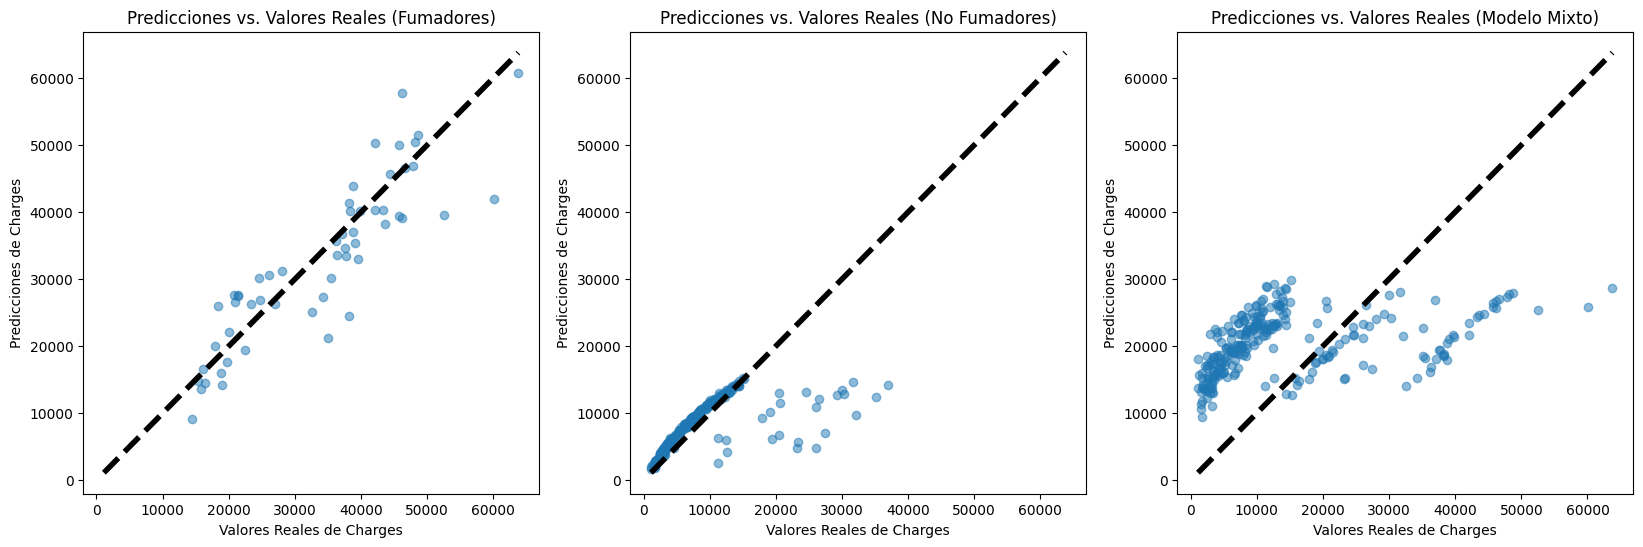

In [ ]:
# Realizar predicciones en los datos de prueba
# Separamos los datos de prueba en fumadores y no fumadores
fumadores_test = test_data[test_data['smoker'] == 1]
no_fumadores_test = test_data[test_data['smoker'] == 0]

# Predicciones para los modelos ajustados por separado
y_pred_fumadores = resultado_fumadores.predict(fumadores_test)
y_pred_no_fumadores = resultado_no_fumadores.predict(no_fumadores_test)

# Predicciones para el modelo mixto
y_pred_mixto = resultado_mixto.predict(test_data)

# Graficar las predicciones vs los valores reales para cada modelo
plt.figure(figsize=(20, 6))

# Gráfico para el modelo con fumadores
plt.subplot(1, 3, 1)
plt.scatter(fumadores_test['charges'], y_pred_fumadores, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (Fumadores)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

# Gráfico para el modelo con no fumadores
plt.subplot(1, 3, 2)
plt.scatter(no_fumadores_test['charges'], y_pred_no_fumadores, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (No Fumadores)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

# Gráfico para el modelo mixto
plt.subplot(1, 3, 3)
plt.scatter(test_data['charges'], y_pred_mixto, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (Modelo Mixto)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.show()

**Métricas de error**

In [ ]:
# Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE) para cada modelo
mse_fumadores = mean_squared_error(fumadores_test['charges'], y_pred_fumadores)
mae_fumadores = mean_absolute_error(fumadores_test['charges'], y_pred_fumadores)

mse_no_fumadores = mean_squared_error(no_fumadores_test['charges'], y_pred_no_fumadores)
mae_no_fumadores = mean_absolute_error(no_fumadores_test['charges'], y_pred_no_fumadores)

mse_mixto = mean_squared_error(test_data['charges'], y_pred_mixto)
mae_mixto = mean_absolute_error(test_data['charges'], y_pred_mixto)

# Resultados de los errores
print("Resultados de los errores:")
print("\n")
print("- MSE (Fumadores): {:.4f}".format(mse_fumadores))
print("- MAE (Fumadores): {:.4f}".format(mae_fumadores))
print("- MSE (No Fumadores): {:.4f}".format(mse_no_fumadores))
print("- MAE (No Fumadores): {:.4f}".format(mae_no_fumadores))
print("- MSE (Modelo Mixto): {:.4f}".format(mse_mixto))
print("- MAE (Modelo Mixto): {:.4f}".format(mae_mixto))

# Calcular el rango de los valores reales
range_y = test_data['charges'].max() - test_data['charges'].min()

# Normalizamos el error
normalized_mae = mae_mixto / range_y

# R^2
r2 = -r2_score(test_data['charges'], y_pred_mixto)

print(f'Error absoluto normalizado: {normalized_mae}')
print(f'Coeficiente de determinación: {r2}')



Resultados de los errores:


- MSE (Fumadores): 34550261.4759
- MAE (Fumadores): 4522.2350
- MSE (No Fumadores): 28387557.6163
- MAE (No Fumadores): 2782.3155
- MSE (Modelo Mixto): 179524287.9797
- MAE (Modelo Mixto): 12343.3692
Error absoluto normalizado: 0.19705590276931362
Coeficiente de determinación: 0.08533113239306056


Se concluye que no se utilizará el modelo mixto debido a su rendimiento significativamente inferior en términos de error absoluto normalizado y coeficiente de determinación. La diferencia en los resultados indica que el modelo mixto único no es capaz de capturar adecuadamente la variabilidad en los datos, mientras que los otros enfoques proporcionan predicciones más precisas y confiables. Los modelos mixtos están diseñados para manejar datos con estructuras jerárquicas o agrupadas, donde se espera que existan efectos aleatorios que capturan variaciones dentro de estos grupos. En este caso, si la relación entre las variables predictoras y el costo de seguros ("charges") es compleja y no lineal, un modelo mixto lineal puede no capturar adecuadamente esa complejidad.

De hecho, la gráfica de dispersión indica que el modelo mixto actual tiene un sesgo sistemático y no captura bien la variabilidad de los datos, especialmente para los valores altos de "charges", lo que explica un R2 negativo.



## PCA

Ahora probamos PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de nuestros datos y observar si una representación más compacta y menos ruidosa de las características podría mejorar el rendimiento del modelo de regresión. PCA transforma las características originales en un nuevo conjunto de variables no correlacionadas, llamadas componentes principales, que explican la mayor parte de la variabilidad en los datos originales. Al usar PCA, nuestro objetivo era simplificar el modelo y mejorar su capacidad predictiva al eliminar redundancias y ruido en los datos.

Para ello, separamos las variables predictoras y variable objetivo ye standarizamos las características para que cada una tenga media 0 y desviación estándar 1. Esto es importante para PCA, ya que se basa en la varianza de los datos y las características con escalas diferentes pueden influir desproporcionadamente en los componentes principales.

In [ ]:
# Variables predictoras (todas las columnas except 'charges')
X = datos.drop('charges', axis=1)

# Variable objetivo
y = datos['charges']

# Crear un objeto para escalar las características
scaler = StandardScaler()

# Escalar las variables predictoras
datos_scalados = scaler.fit_transform(X)

Aplicamos PCA con 4 componentes principales. Observamos los componentes principales y la proporción de la varianza explicada por cada uno (vemos que con 4 componentes explicamos un 71%)

In [ ]:
# Crear un objeto PCA
pca = PCA(n_components=4)  # Especificar el número de componentes principales deseado

# Aplicar PCA a las características escaladas
X_pca = pca.fit_transform(datos_scalados)

# Ver los componentes principales y su proporción de varianza explicada
print("Componentes Principales:\n", pca.components_)
print("\nVarianza Explicada por cada Componente Principal:\n", pca.explained_variance_ratio_)

Componentes Principales:
 [[ 0.23842946 -0.14892966  0.6897813   0.05108903  0.17342743 -0.64225069]
 [-0.52392975 -0.55166661 -0.15227848 -0.11574926  0.61582431 -0.0730436 ]
 [ 0.4084764  -0.37518087 -0.04387484  0.75436852  0.17790148  0.29956725]
 [-0.57739387  0.42316671 -0.00897357  0.63962485 -0.02719231 -0.27857917]]

Varianza Explicada por cada Componente Principal:
 [0.21457599 0.18225984 0.17333112 0.15685281]


Por último, dividimos los datos transformados en conjuntos de entrenamiento y prueba, entrenamos un modelo de regresión lineal igual que en los otros modelos, y evaluamos su rendimiento usando varias métricas como MSE, MAE, error absoluto normalizado y R².

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)

**Modelo de regresión utilizando PCA**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)

**Valores reales vs predichos**

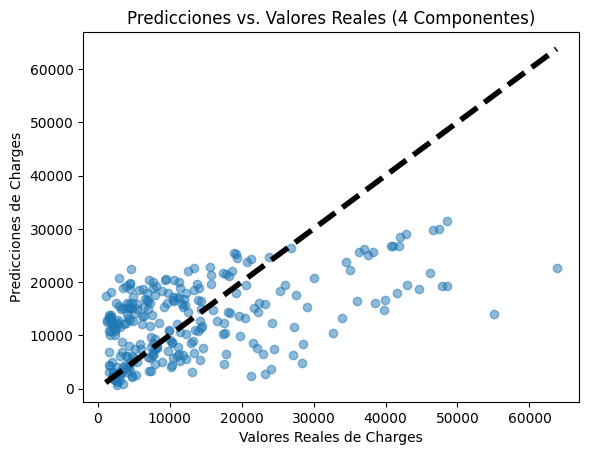

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (4 Componentes)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

**Métricas de error**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

range_y = y_test.max() - y_test.min()

normalized_mae = mae_mixto / range_y

r2 = r2_score(y_test, y_pred)

print("- MSE (4 Componentes): {:.4f}".format(mse))
print("- MAE (4 Componentes): {:.4f}".format(mae))
print(f'Error absoluto normalizado: {normalized_mae}')
print(f'Coeficiente de determinación: {r2}')

- MSE (4 Componentes): 110930513.4640
- MAE (4 Componentes): 8039.7369
Error absoluto normalizado: 0.1971040153537407
Coeficiente de determinación: 0.2590646005006909


Observamos que los resultados no son mucho mejores que otros modelos, pero repetimos el proceso con 5 componentes principales:

Componentes Principales:
 [[ 0.23842946 -0.14892966  0.6897813   0.05108903  0.17342743 -0.64225069]
 [-0.52392975 -0.55166661 -0.15227848 -0.11574926  0.61582431 -0.0730436 ]
 [ 0.4084764  -0.37518087 -0.04387484  0.75436852  0.17790148  0.29956725]
 [-0.57739387  0.42316671 -0.00897357  0.63962485 -0.02719231 -0.27857917]
 [ 0.30175463  0.58345266 -0.12665227 -0.06877208  0.73928437  0.03486194]]

Varianza Explicada por cada Componente Principal:
 [0.21457599 0.18225984 0.17333112 0.15685281 0.15386005]


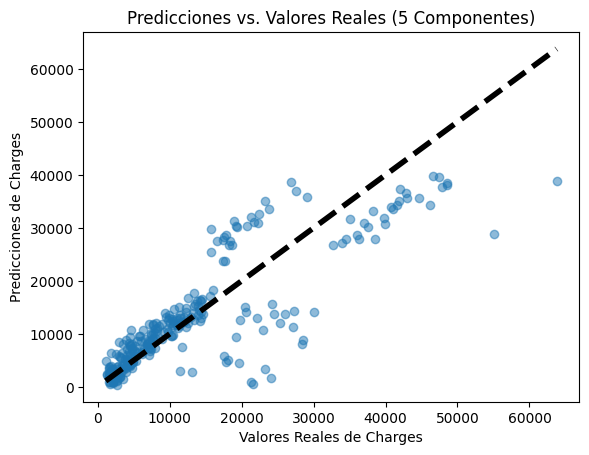

- MSE (5 Componentes): 42172852.0844
- MAE (5 Componentes): 4247.0942
Error absoluto normalizado: 0.06781935351192764
Coeficiente de determinación: 0.7183159256055863


In [ ]:
# Crear un objeto PCA
pca = PCA(n_components=5)

# Aplicar PCA a las características escaladas
X_pca = pca.fit_transform(datos_scalados)

# Ver los componentes principales y su proporción de varianza explicada
print("Componentes Principales:\n", pca.components_)
print("\nVarianza Explicada por cada Componente Principal:\n", pca.explained_variance_ratio_)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicciones vs. Valores Reales (5 Componentes)')
plt.xlabel('Valores Reales de Charges')
plt.ylabel('Predicciones de Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
range_y = y_test.max() - y_test.min()
normalized_mae = mae / range_y
r2 = r2_score(y_test, y_pred)


print("- MSE (5 Componentes): {:.4f}".format(mse))
print("- MAE (5 Componentes): {:.4f}".format(mae))
print(f'Error absoluto normalizado: {normalized_mae}')
print(f'Coeficiente de determinación: {r2}')

La aplicación de PCA de 4 componentes no mejora significativamente el rendimiento del modelo en comparación con la regresión lineal múltiple sin reducción de dimensionalidad. Además, presenta un coeficiente de determinación negativo, indicando un ajuste muy pobre. En cambio, PCA con 5 componetes reduce signficativamente el error absoluto normalizado y además tiene un R^2 bastante elevado, por lo que puede ser relevante a la hora de la seleción del modelo final.



## Mínimos cuadrados parciales (PLS)

Minimos cuadrados parciales es una técnica de análisis multivariante que combina características de la regresión múltiple y el análisis de componentes principales (PCA). Se utiliza principalmente en situaciones donde las variables predictoras presentan correlación, aunque este no es el caso, buscamos ver si al reducir la dimensionalidad de los datos por otro método distinto a PCA obtenemos mejores predicciones.

La regresión lineal intenta minimizar el error cuadrático entre las predicciones y los valores reales directamente, mientras que PLS reduce primero la dimensión del espacio de las variables predictoras antes de hacer la regresión.

Lo hace buscando combinaciones lineales de las variables predictoras que capturan la mayor parte de la varianza relacionada con la variable de respuesta.

Los pasos que sigue la regresión por mínimos cuadrados parciales son los siguientes:

* Extracción de Componentes: Se encuentran combinaciones lineales de las variables originales (X), estos componentes a diferencia de PCA no solo explican la varianza de las X, si no que también la covarianza con la variable respuesta Y.  

* Deflación de las variables: Ya que se tiene un componente, se les resta  la información explicada por ese componente a las variables,  para así encontrar el siguiente componente que explique la varianza que queda de X y la covarianza con Y.  

* Esto se repite hasta que se cumpla el criterio de parada decidido

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción del 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el rango de componentes
componentes = np.arange(1, 7)
mse_scores = []

# Validación cruzada para definir el número de componentes óptimo
for n in componentes:
    pls = PLSRegression(componentes=n)
    y_cv = cross_val_predict(pls, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    mse = mean_squared_error(y, y_cv)
    mse_scores.append(mse)

numero_optimo = componentes[np.argmin(mse_scores)]

print(f'El número óptimo de componentes es: {numero_optimo}')

El número óptimo de componentes es: 3


Ahora se realiza una validación cruzada para elegir el número óptimo de componentes. En cada iteración, se configura un nuevo modelo PLS con un número específico de componentes y se calcula el error cuadrático medio (MSE) correspondiente. El criterio de parada utilizado para la validación cruzada es un número predefinido de componentes.

Posteriormente, se identifica el número de componentes que resulta en el MSE más bajo. Determinamos que el número óptimo de componentes es 3.

Con este número definido, procedemos a construir el modelo utilizando 3 componentes.Estos componentes son combinaciones lineales de las características originales.

**Modelo de regresión utilizando PLS**

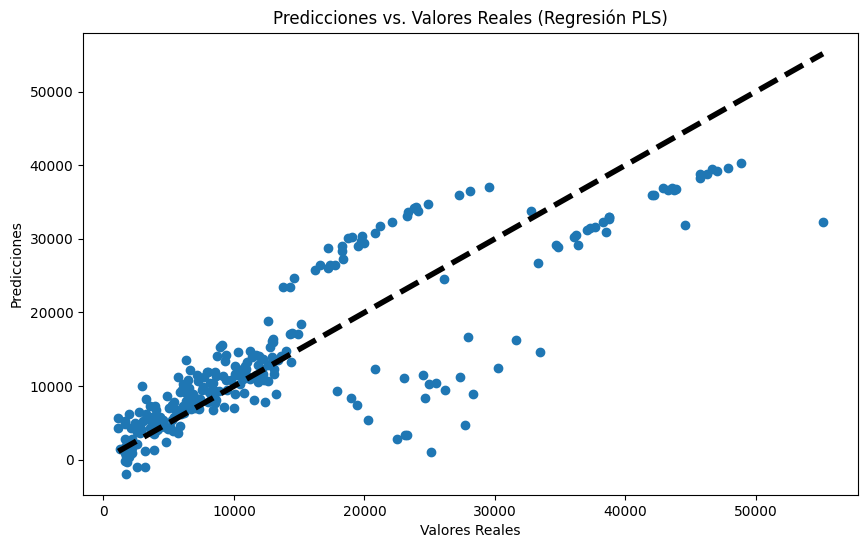

In [ ]:
# Entrenamiento del modelo con el número óptimo de componentes
pls = PLSRegression(n_components=numero_optimo)
pls.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = pls.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Regresión PLS)')
plt.show()

**Métricas de error**

Para ver como se ajusta el modelo a los datos calulamos su error cuadrático medio (MSE), su error absoluto medio (MAE), el MAE normalizado, y por último el coeficiente de determinación.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el rango de los valores reales
range_y = y_test.max() - y_test.min()

# Normalizamos el error
normalized_mae = mae / range_y

# R^2
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio en el conjunto de prueba: {mean_squared_error(y_test, y_pred)}')
print(f'Error absoluto medio en el conjunto de prueba: {mean_absolute_error(y_test, y_pred)}')
print(f'Error absoluto normalizado: {normalized_mae}')
print(f'Coeficiente de determinación: {r2}')

Error cuadrático medio en el conjunto de prueba: 44475866.85900335
Error absoluto medio en el conjunto de prueba: 4589.737698337176
Error absoluto normalizado: 0.0850046552281253
Coeficiente de determinación: 0.7025940847467247


Un $R^2$ de 0.703 indica que aproximadamente el 70.3% de la variabilidad en la variable objetivo "charges" puede ser explicada por los 3 componentes utilizados en el modelo. Aunque este valor muestra que el modelo tiene un buen poder explicativo, aún hay un 29.7% de la variabilidad que no se explica

# Evaluación - Resultados

A lo largo del trabajo, hemos considerado varios enfoques, incluyendo modelos de regresión simples, múltiples (con diferentes cantidades de atributos), mixtos, PCA con diferentes componentes y PLS (Partial Least Squares). A continuación, se presentan los resultados de los errores y coeficientes de determinación para cada modelo:

In [ ]:
df = {
    "Modelo": [
        "Modelo Simple",
        "Modelo Múltiple (3 atributos)",
        "Modelo Múltiple (6 atributos)",
        "Modelo Mixto",
        "PCA (4 componentes)",
        "PCA (5 componentes)",
        "PLS"
    ],
    "MSE": [
        65448661.501558736,
        44436592.377412215,
        44430692.94936986,
        179524287.9797,
        110930513.4640,
        42172852.0844,
        44475866.85900335
    ],
    "MAE": [
        6140.24088327077,
        4590.77814863148,
        4589.319240321008,
        12343.3692,
        8039.7369,
        4247.0942,
        4589.737698337176
    ],
    "Error Absoluto Normalizado": [
        0.113720890736124,
        0.08502392498259978,
        0.08499690513830976,
        0.19705590276931362,
        0.1971040153537407,
        0.06781935351192764,
        0.0850046552281253
    ],
    "Coeficiente de Determinación (R²)": [
        0.5623509905342616,
        0.7028567094906277,
        0.7028961584079916,
        -0.08533113239306056,
        0.25906460050069446,
        0.7183159256055863,
        0.7025940847467247
    ]
}

df = pd.DataFrame(df)

#tabulate para mostrar la tabla bien formateada
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-------------------------------+-------------+----------+------------------------------+-------------------------------------+
|    | Modelo                        |         MSE |      MAE |   Error Absoluto Normalizado |   Coeficiente de Determinación (R²) |
+====+===============================+=============+==========+==============================+=====================================+
|  0 | Modelo Simple                 | 6.54487e+07 |  6140.24 |                    0.113721  |                           0.562351  |
+----+-------------------------------+-------------+----------+------------------------------+-------------------------------------+
|  1 | Modelo Múltiple (3 atributos) | 4.44366e+07 |  4590.78 |                    0.0850239 |                           0.702857  |
+----+-------------------------------+-------------+----------+------------------------------+-------------------------------------+
|  2 | Modelo Múltiple (6 atributos) | 4.44307e+07 |  4589.32 |      

Al ver todos lo errores juntos, somos capaces de ver cuales son los mejores modelos. Estas son algunas de las conclusiones que se han extraido de la tabla presentada.

- **Modelo Simple**: Aunque es el más sencillo de implementar, muestra un MSE relativamente alto y un MAE elevado, con un R² de 0.562351. Esto indica que no explica suficientemente la variabilidad de los datos.

- **Modelos Múltiples (3 y 6 atributos)**: Ambos modelos tienen un rendimiento similar, con un MSE y MAE menores comparados con el modelo simple y una mejora significativa en el R² (alrededor de 0.7029). Sin embargo, añadir más atributos no proporciona una mejora significativa en el rendimiento.

- **Modelo Mixto**: Este modelo presenta los peores resultados con un MSE muy alto y un R² negativo, lo cual indica que no es adecuado para nuestros datos. Es un enfoque novedoso que se ha probado para tratar de investigar nuevas opciones, sin embargo, no ha salido como se esparaba.

- **PCA (4 y 5 componentes)**: Aunque el PCA con 5 componentes tiene un R² ligeramente superior (0.718316) y un MAE más bajo comparado con el modelo PLS, el PCA con 4 componentes no ofrece mejoras suficientes. Esto muestra que la selección del número de componentes en PCA es crucial para el rendimiento del modelo.

- **Modelo PLS**: El modelo PLS muestra un MSE, MAE y Error Absoluto Normalizado similares a los modelos múltiples, con un R² de 0.702594. Aunque no tiene el R² más alto, su rendimiento es consistente en comparación con otros modelos evaluados.

Finalmente, el modelo PLS ha sido considerado el mejor modelo debido a su equilibrio entre complejidad y rendimiento. Proporciona resultados similares a los mejores modelos múltiples sin la necesidad de un alto número de componentes como en PCA. Además, PLS es particularmente útil cuando las variables predictoras están altamente correlacionadas, lo cual es común en problemas como el nuestro.

---

Vamos a aplicar métodos adicionales de evaluación para el modelo PLS para asegurarnos de su eficacia. Estos métodos incluyen:

- Curva de ROC.
- Matriz de Confusión.
- Intervalos de Confianza de los Residuos.
- Gráfica de los Residuos.
- Distribución de los Errores.
- Gráfico Q-Q.

**CURVA DE ROC.**

La Curva ROC es una herramienta gráfica que se utiliza para evaluar el rendimiento de un modelo de clasificación binaria. Esta curva muestra la capacidad del modelo para distinguir entre dos clases al trazar la Tasa de Verdaderos Positivos (TPR) contra la Tasa de Falsos Positivos (FPR) a diferentes umbrales de clasificación. El área bajo la curva (AUC) proporciona una medida cuantitativa de la capacidad del modelo para separar las dos clases. Un valor de AUC de 0.5 indica un rendimiento aleatorio, mientras que un valor de 1.0 indica una clasificación perfecta.

Para aplicar la Curva ROC a nuestro modelo de regresión multiclase, es necesario convertir el problema en un problema binario. Este proceso se denomina binarización. En este caso, se ha realizado la binarización de las salidas del modelo PLS de la siguiente manera:

Tanto la variable objetivo como las predicciones del modelo se han hecho binarias utilizando la mediana de los valores. Los valores mayores a la mediana se consideraron como la clase positiva, mientras que los valores menores o iguales a la mediana se consideraron como la clase negativa.

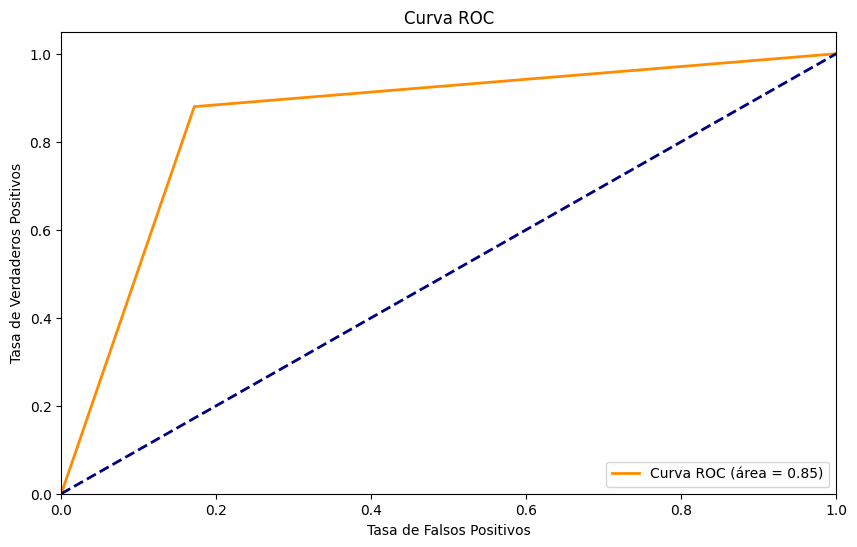

In [ ]:
# Curva ROC
y_test_b = y_test > y_test.median()
y_pred_b = y_pred > y_test.median()
fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_b)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La Curva ROC obtenida muestra la capacidad del modelo PLS para distinguir entre valores altos y bajos de la variable objetivo tras la binarización. La AUC resultante es de 0.85, lo que nos indica un buen rendimiento del modelo en términos de clasificación binaria. Este resultado nos demuestra que el modelo PLS tiene una alta capacidad de diferenciar eficazmente entre las dos clases binarizadas.

**MATRIZ DE CONFUSIÓN.**

La matriz de confusión es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación, mostrando las predicciones correctas e incorrectas comparadas con las observaciones reales. En el contexto de modelos de regresión, podemos adaptar la matriz de confusión utilizando intervalos para convertir la salida continua en categorías discretas. Esto permite evaluar cómo el modelo predice los valores dentro de diferentes rangos de la variable objetivo.

Para aplicar la matriz de confusión a nuestro modelo PLS, al igual que con la curva de ROC, modificamos nuestros datos siguiendo los siguientes pasos:

- Definición de Intervalos: La variable objetivo y las predicciones se categorizan utilizando umbrales basados en los valores mínimos, la mediana y los valores máximos. Esto crea 4 intervalos que dividen la distribución de los datos en categorías.

- Categorización de Datos: Utilizando la función np.digitize, se asignan las observaciones y predicciones a los intervalos definidos.

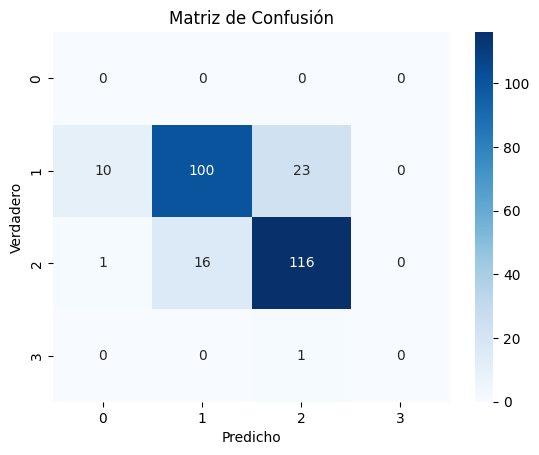

In [ ]:
# Matriz de confusión
thr = [y_test.min(), y_test.median(), y_test.max()]
y_test_int = np.digitize(y_test, thr)
y_pred_int = np.digitize(y_pred, thr)
mc = confusion_matrix(y_test_int, y_pred_int)

sns.heatmap(mc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión nos indica que el modelo es eficaz en la clasificación de la mayoría de las observaciones en los intervalos centrales, pero muestra algunas dificultades en los extremos. Este análisis nos proporciona información extra sobre la precisión del modelo en diferentes rangos de la variable objetivo. Gracias a esta grafica, podemos complementar las métricas de evaluación tradicionales como los errores y podemos identificar en que rangos se equivoca más amenudo el modelo.

**INTERVALOS DE CONFIANZA DE LOS RESIDUOS.**

Los intervalos de confianza proporcionan una medida de la incertidumbre asociada con las predicciones del modelo. Calcular y visualizar los intervalos de confianza de los residuales nos permite evaluar la precisión y variabilidad de las predicciones.

Los residuos representan la diferencia entre los valores reales y las predicciones del modelo, y un análisis detallado de estos puede revelar información muy importante sobre el rendimiento del modelo.

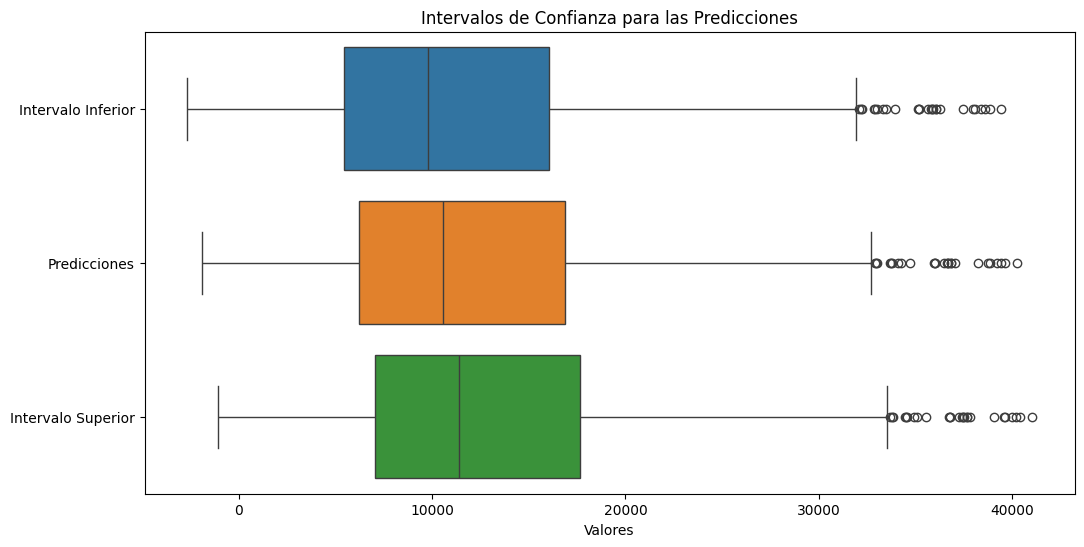

In [ ]:
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Calcular los residuales
residuos = y_test - y_pred

# Calcular el intervalo de confianza para las predicciones individuales
ic = 1.96 * np.std(residuos) / np.sqrt(len(y_test))

# Graficar los intervalos de confianza con un boxplot
pd = pd.DataFrame({
    'Valores Reales': y_test,
    'Predicciones': y_pred,
    'Intervalo Inferior': y_pred - ic,
    'Intervalo Superior': y_pred + ic
})

plt.figure(figsize=(12, 6))
sns.boxplot(data=pd[['Intervalo Inferior', 'Predicciones', 'Intervalo Superior']], orient='h')
plt.title('Intervalos de Confianza para las Predicciones')
plt.xlabel('Valores')
plt.show()

En general, la variabilidad de los residuales nos indica que, aunque el modelo PLS realiza predicciones razonablemente bien, todavía hay margen para mejorar su precisión. Los valores atípicos indican predicciones que se desvían significativamente de los valores reales, lo cual puede ser un área de enfoque para futuras mejoras del modelo PLA.

**GRÁFICA RESIDUAL.**

La gráfica de residuales es una herramienta para evaluar la calidad de un modelo de regresión. En esta gráfica, se trazan los residuos contra los valores predichos. Esta visualización permite identificar patrones en los errores que podrían indicar problemas con el modelo, como heterocedasticidad, no linealidad o la presencia de valores atípicos.

En la parte de regresión simple, ya hemos utilizado una gráfica de residuales para analizar la relación entre los errores de predicción y los valores predichos. Este análisis nos ayudó a identificar si los errores eran aleatorios o si había patrones sistemáticos que el modelo no estaba capturando.

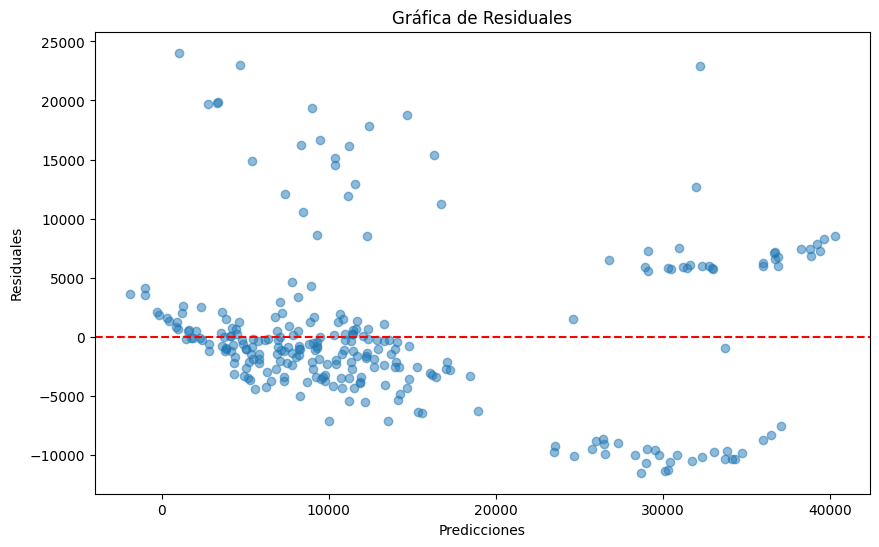

In [ ]:
# Gráfica de Residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

**DISTRIBUCIÓN DE LOS ERRORES**

Un análisis detallado de la distribución de los residuales puede revelar si los errores siguen una distribución normal, lo cual es una condición deseable para muchos modelos de regresión, ya que indica que los errores son aleatorios y que el modelo está ajustando bien los datos.

En la gráfica de distribución de los errores, los residuales se representan en un histograma, añadiendo una línea de densidad de kernel (KDE) para visualizar mejor la forma de la distribución. Esta visualización permite identificar si los errores están centrados alrededor de cero y si siguen una distribución simétrica.

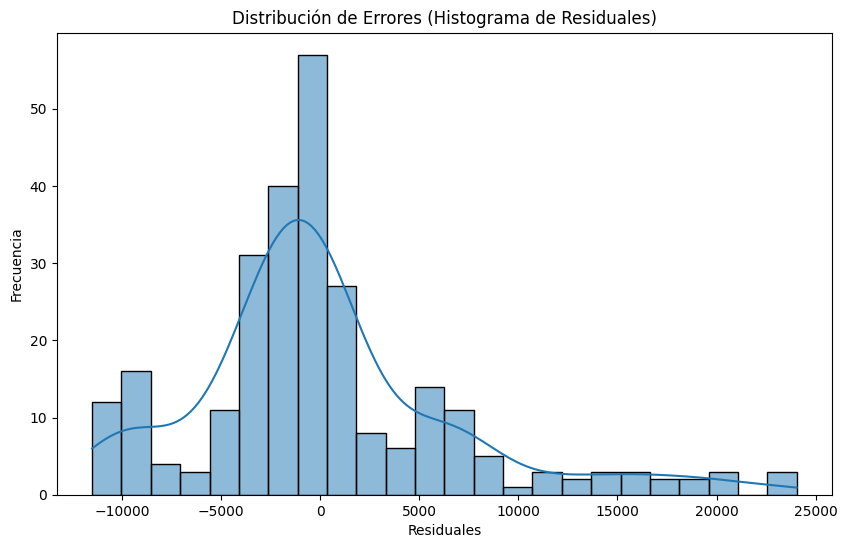

In [ ]:
# Distribución de Errores
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores (Histograma de Residuales)')
plt.show()

Para que la distribución de los errores sea óptima, los errores deberían seguir una distribución normal, estar centrados alrededor de cero y no tener valores atípicos significativos. En este caso, aunque la mayoría de los errores están centrados alrededor de cero, la asimetría y la presencia de valores atípicos sugieren que como ya nos ha indicado otras métricas, hay margen para mejorar el modelo.

**GRÁFICO Q-Q.**

El gráfico Q-Q es una herramienta estadística utilizada para comparar la distribución de un conjunto de datos con una distribución teórica, comúnmente una distribución normal. En el contexto de la regresión, un gráfico Q-Q de los residuales permite evaluar si los errores del modelo siguen una distribución normal, que, como ya hemos mencionado, es un supuesto importante para los modelos de regresión.

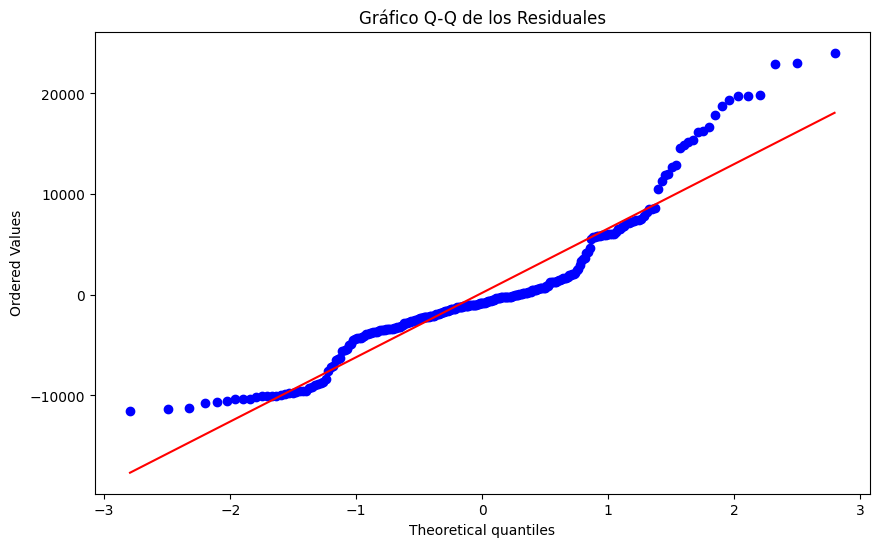

In [ ]:
# Gráfico Q-Q (Quantile-Quantile)
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')
plt.show()

El gráfico Q-Q de los residuales del modelo PLS complementa la gráfica anterior de la distribución de los errores al proporcionarnos una evaluación visual más detallada de la normalidad de los residuales.

Para que los residuales sean óptimos y sigan una distribución normal, los puntos en el gráfico Q-Q deberían alinearse lo más cerca posible de la línea recta. La desviación observada en este gráfico indica que los errores no son completamente normales, lo que podría afectar algunas propiedades estadísticas del modelo.

# Conclusiones






En el presente estudio, hemos explorado diversos enfoques de modelado predictivo para estimar los costos de seguros médicos. Los modelos investigados incluyen regresión lineal simple y múltiple, modelos mixtos, Análisis de Componentes Principales (PCA) y Mínimos Cuadrados Parciales (PLS). Se ha visto que la correcta implementación de modelos predictivos no solo optimiza los recursos y mejora la precisión en la fijación de primas, sino que también contribuye a una gestión más eficaz del riesgo y a una mejor planificación estratégica a largo plazo.

A partir de estos análisis, hemos extraído varias conclusiones clave y recomendaciones para la implementación práctica en la industria de seguros médicos:

- Optimización de Recursos Financieros: Ayuda a las aseguradoras a asignar de manera eficiente los recursos financieros, asegurando que se disponga de suficiente capital para cubrir reclamaciones mientras se mantienen los costos operativos bajo control.

- Determinación de Primas de Seguros: Permite la fijación de primas más precisas y justas para los asegurados, basándose en el riesgo individual. Esto puede mejorar la satisfacción del cliente y la competitividad en el mercado.

- Evaluación del Riesgo: Facilita la identificación de perfiles de alto riesgo, permitiendo a las aseguradoras diseñar estrategias de mitigación de riesgos más efectivas y personalizadas.

- Planeación a Largo Plazo: Contribuye a la planeación estratégica a largo plazo, ayudando a prever tendencias y ajustar las políticas de seguros en consecuencia.


**Aprendizajes del Capstone**


Este trabajo ha resaltado la importancia de probar distintos modelos para encontrar el más adecuado para un conjunto de datos específico. Principalmente hemos visto que diferentes modelos ofrecen diversos grados de precisión y generalización. Es esencial evaluar múltiples enfoques antes de decidir cuál implementar.


**Recomendaciones para la Implementación en la Industria de Seguros Médicos**

Para implementar los modelos predictivos creados en la industria de seguros médicos, se podrían sugerir las siguientes estrategias:

- Invertir en técnicas de feature engineering para crear nuevas variables que puedan capturar mejor las características de los asegurados.

- Implementar un proceso continuo de evaluación y ajuste de los modelos para asegurar que se mantengan precisos y relevantes a medida que cambian los datos y las condiciones del mercado.

- Aprovechar infraestructuras capaces de soportar el procesamiento de grandes volúmenes de datos y la ejecución de modelos complejos. Esto puede incluir el uso de tecnologías en la nube y plataformas de análisis de datos avanzadas.

**Trabajo Futuro**

El estudio abre la puerta a futuras investigaciones y desarrollos en el campo de la predicción de costos de seguros médicos. Se podrían incluir datos adicionales como historial médico detallado, hábitos de vida, y datos socioeconómicos para mejorar la precisión de los modelos, así como profundizar en el análisis de subgrupos específicos de la población asegurada para identificar patrones y tendencias particulares. También se podría usar los modelos predictivos para evaluar el impacto de diferentes intervenciones de salud y políticas de seguros sobre los costos médicos.


# Referencias

1. Cigna Healthcare. (s.f.). ¿Cómo funcionan los seguros de salud? Recuperado de https://www.cigna.com/es-us/knowledge-center/how-health-insurance-works

2. Saber es Poder. (s.f.) ¿Cuánto cuesta un seguro médico en Estados Unidos? Recuperado de https://saberespoder.com/articles/health/cuanto-cuesta-un-seguro-medico-en-estados-unidos#

3.  Morales Oñate, V. (2022, junio 30). *Modelos mixtos* [Video]. YouTube. [https://www.youtube.com/watch?v=g-jjcsyJyZY](https://www.youtube.com/watch?v=g-jjcsyJyZY)

4. Hajduk, G. K. (2022). *Introduction to linear mixed models*. Our Coding Club. Recuperado el 19 de mayo de 2024, de [https://ourcodingclub.github.io/tutorials/mixed-models/](https://ourcodingclub.github.io/tutorials/mixed-models/)

5. Salazar Uribe, J. (2017). *Introducción a los modelos mixtos*. ResearchGate. Recuperado el 19 de mayo de 2024, de [https://www.researchgate.net/publication/314536942_Introduccion_a_los_modelos_mixtos_Introduction_to_mixed_models](https://www.researchgate.net/publication/314536942_Introduccion_a_los_modelos_mixtos_Introduction_to_mixed_models)

6. St. Jude Children's Research Hospital. (n.d.). *Comprender cómo funciona el seguro médico*. Together. Recuperado el 19 de mayo de 2024, de [https://together.stjude.org/es-us/para-familias/abordar-la-atención-médica/finanzas/comprender-cómo-funciona-el-seguro-médico.html](https://together.stjude.org/es-us/para-familias/abordar-la-atención-médica/finanzas/comprender-cómo-funciona-el-seguro-médico.html)

7. Mordor Intelligence. (n.d.). *Mercado de seguros médicos y de salud en Estados Unidos - Informe de la industria*. Recuperado el 19 de mayo de 2024, de [https://www.mordorintelligence.com/es/industry-reports/united-states-health-and-medical-insurance-market](https://www.mordorintelligence.com/es/industry-reports/united-states-health-and-medical-insurance-market)